# Linear Regression 
# Step by Step along with a simple example implemented in Python

Consider a data set that consists of $n$ pairs $(x_{i},y_{i})$, where $x_{i}$ is an observed value of variable $X$ and $y_{i}$ is the observed value of variable $Y$. The simple linear regression model reads $$y_{i} = \beta_{0} + \beta_{1} x_{i} + \epsilon_{i}$$ 

The above equation expresses the relation between variables $X$ and $Y$. Here, the parameter $\beta_{0}$ refer to as the intercept, $\beta_{1}$ is the slope of the regression line, and $\epsilon$ is the error (or residual). In other words, a residual is the vertical distance between a point $(x_{i},y_{i})$ and the regression line.

Note that, the variable $X$ is known as the independent variable (a variable that stands alone and does not change by the other variables you are trying to measure), whereas $Y$ is known as the dependent variable (something that depends on other factors). 

Here, we are dealing with a linear model and the goal is to draw a straight line through our data. For this model to be useful we would like to estimate the parameters $\beta_{0}$ and $\beta_{1}$ that minimize the sum of squared residuals $\mathrm{SSR} = \sum_{i=1}^{n} \epsilon_{i}^{2} = \sum_{i=1}^{n} (y_{i} - \beta_{0} - \beta_{1} x_{i})^{2}$ .  

SSR is minimized when the partial derivatives of the SSR with respect to the unknowns ($\beta_{0}, \beta_{1}$) are set to zero: $\frac{\partial SSR}{\partial \beta_{0}} =0$; $\frac{\partial SSR}{\partial \beta_{1}} =0$.

To find the intercept: $$\frac{\partial SSR}{\partial \beta_{0}} = \sum_{i=1}^{n} (y_{i} - \beta_{0} - \beta_{1} x_{i}) = 0 \\ \sum_{i=1}^{n} y_{i} = n\beta_{0} + \beta_{1} \sum_{i=1}^{n} x_{i} \\ n \overline{y} = n\beta_{0} + n \beta_{1} \overline{x} \\ \beta_{0} = \overline{y} - \beta_{1} \overline{x}$$

Here, the overline symbol denotes a mean variable; for instance $\overline{y} = \frac{1}{n} \sum_{i=1}^{n} y_{i}$.


To find the regression coefficient: $$\frac{\partial SSR}{\partial \beta_{1}} = \sum_{i=1}^{n} x_{i} (y_{i} - \beta_{0} - \beta_{1} x_{i}) = 0 \\  \sum_{i=1}^{n} x_{i} (y_{i} - \overline{y}  +\beta_{1} \overline{x} - \beta_{1} x_{i}) = 0 \\ \sum_{i=1}^{n} x_{i} y_{i} - \overline{y} \sum_{i=1}^{n} x_{i} = \beta_{1} \sum_{i=1}^{n} (x_{i} - \overline{x}) \\  \sum_{i=1}^{n} x_{i} y_{i} -\overline{y}\overline{x} = \beta_{1} \sum_{i=1}^{n} x_{i}^{2} - \beta_{1} \overline{x} \sum_{i=1}^{n} x_{i} \\   \beta_{1} = \frac{  \sum_{i=1}^{n} x_{i} y_{i} -\overline{y}\overline{x}}{\sum_{i=1}^{n} (x_{i} - \overline{x})^{2}} \\ \beta_{1} = \frac{\mathrm{Cov}(x,y)}{\mathrm{Var}(x)}  $$

Here, $\mathrm{Cov}(x,y)$ stands for covariance which provides a measure of the strength of the correlation between $x$ and $y$, and  $\mathrm{Var}(x)$ stands for variance and measures how far a set of numbers are spread out from their average value. 

# Implementation
We are going to apply the above methodology on a sample data set containing information about the price of Toyota Corolla and how this price is affected by the car age. Note that this particular data set contains additional pertinent information but they will be exclused from this exercise. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#plt.rcParams['figure.figsize'] = (20.0, 10.0)

# Reading Data
Input_data = pd.read_csv('/Users/konmenelaou/Desktop/PYTHON/ToyotaCorolla.csv')
print(Input_data.shape)
Input_data.head()

(1436, 10)


,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,1170


In [3]:
# Collecting X and Y
X = Input_data['Age'].values
Y = Input_data['Price'].values

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
m = len(X)

# calculate b1 and b2 (see the above formula)
numer = 0
denom = 0
for i in range(m):
    numer += (X[i]*Y[i]) - (mean_x*mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients
print(b1, b0)

-170.93358501154228 20294.058648904807


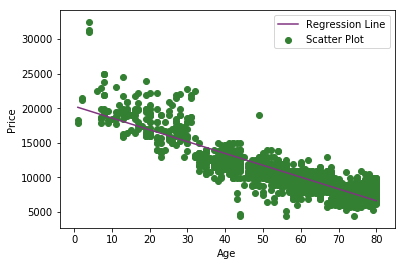

In [4]:
# Plotting Values and Regression Line

max_x = np.max(X) 
min_x = np.min(X) 

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color=(0.5,0.2,0.5), label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, color=(0.2,0.5,0.2), label='Scatter Plot')

plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()
plt.show()

Now that we have the model, we would like to know how good this model actually is. To do so, we will use the Root Mean Squared Error (RMSE) and Coefficient of Determination ($R^{2}$ score). 
Recall that squaring the residuals, averaging the squares, and taking the square root gives us the RMSE. In other words, RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n} (\hat{y_{i}} - y_{i})^{2}}$. Here, $\hat{y_{i}}$ indicates the predicted values.

On the other hand, $R^{2}$ is defined as $R^{2} \equiv 1 - \frac{SS_{r}}{SS_{t}}$ in which $SS_{t} = \sum_{i=1}^{n} (y_{i} - \overline{y})^{2}$, and $SS_{r} = \sum_{i=1}^{n} (y_{i} - \hat{y_{i}})^{2}$

In [5]:
# Calculating Root Mean Squares Error
RMSE = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    RMSE += (y_pred - Y[i]) ** 2
RMSE = np.sqrt(RMSE/m)
print(RMSE)

ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
R2 = 1 - (ss_r/ss_t)
print(R2)

1744.8218989236705
0.7684108996825325


As a sanity check, we would like to compare the results of our model with the results coming out from a standarized package that is already implmented in Python (included within the sklearn package). If our model is correct then the two methods should ouput the same results. 

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cannot use Rank 1 matrix in scikit learn
X = X.reshape((m, 1))
# Creating Model
reg = LinearRegression()
# Fitting training data
reg = reg.fit(X, Y)
# Y Prediction
Y_pred = reg.predict(X)

# Calculating RMSE and R2 Score
mse = mean_squared_error(Y, Y_pred)
RMSE = np.sqrt(mse)
R2_score = reg.score(X, Y)

print(RMSE)
print(R2_score)

1744.8218989236718
0.7684108996825327
